In [22]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt     


from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler 
# import plotly.graph_objects as go


# from sklearn.ensemble import IsolationForest  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed 
import seaborn as sns #visualisation


In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV    

#### Read the dataset 
- data normal   

In [24]:
# import data set from the local driver 
dff=pd.read_csv('SWaT_Dataset_Normal_v0.csv')#, parse_dates = ['Timestamp'], index_col = 'Timestamp') 
dff.head() 
df=pd.read_csv('SWaT_Dataset_Attack_v0 - Copy.csv')#, parse_dates = ['Timestamp'], index_col = 'Timestamp')
frames = [dff,df] 
df_concat=pd.concat(frames) 
df_concat.head(5)     

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal


#### Automatic Sensor data extraction   

In [4]:
# Extract the sensor components that begin with the list 
dff=df_concat.filter(regex='(^Time|^PIT|^AIT|^FIT|^DPI|^LIT|^Norma)',axis=1)#.head()
dff.head()  

,Timestamp,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,Normal/Attack
0,22/12/2015 4:00:00 PM,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
1,22/12/2015 4:00:01 PM,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
2,22/12/2015 4:00:02 PM,2.439548,260.9131,244.3284,8.19008,306.101,2.467305,20.84320,2.233354,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
3,22/12/2015 4:00:03 PM,2.428338,260.2850,244.3284,8.19008,306.101,2.466536,20.84320,2.233354,327.2799,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
4,22/12/2015 4:00:04 PM,2.424815,259.8925,244.4245,8.19008,306.101,2.466536,20.84320,2.233354,327.1597,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal


In [26]:
# # timestamp to DateTime 
df_concat['Timestamp'] = pd.to_datetime(df_concat['Timestamp']) 
df_concat.head()  

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
1,2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2,2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
3,2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
4,2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal


In [27]:
# remove the space on Normal/Attack columns 
df_concat['Normal/Attack'] = df_concat['Normal/Attack'].str.replace(' ', '')  
#To see how the data is spread betwen Attack and Normal 
print(df_concat.groupby('Normal/Attack')['Normal/Attack'].count())  
# Rename the col name Normal/Attack with A   
df_concat.rename(columns = {'Normal/Attack':'A'}, inplace = True)
df_concat.head(2)    

Normal/Attack
Attack     54621
Normal    892098
Name: Normal/Attack, dtype: int64


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,A
0,2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
1,2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal


In [30]:
# Convert non-numeric class to numeric

df_concat.A[df_concat.A== 'Normal'] = 0 
df_concat.A[df_concat.A == 'Attack'] = 1    
df_concat.head()  

/tmp/ipykernel_2140289/4052912106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat.A[df_concat.A== 'Normal'] = 0
/tmp/ipykernel_2140289/4052912106.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat.A[df_concat.A == 'Attack'] = 1


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,A
0,2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
1,2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
2,2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
3,2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
4,2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0


In [31]:
# make the class as float 
df_concat['A'] = df_concat['A'].astype('float')   

In [32]:
# a Timestamp as index 
dff= df_concat.set_index('Timestamp') 
dff.head()   

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0.0
2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0.0
2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0.0
2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0.0
2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0.0


In [33]:
#If there are missing entries, drop them.
dff.dropna(inplace=True)#,axis=1)  
# Total number of rows and columns 
dff.shape   

(946719, 52)

In [34]:
# Dropping the duplicates 
dff= dff.drop_duplicates()
dff.head(2)     

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0.0
2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0.0


In [35]:
# looking the distribution of the data between attack and normal

print(dff.groupby('A')['A'].count())    

A
0.0    875250
1.0     53648
Name: A, dtype: int64


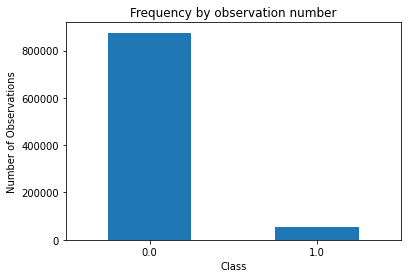

In [36]:
#Visualizing the imbalanced dataset
count_classes = pd.value_counts(dff['A'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(dff['A'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");    

#### Normalize using min Max scaler    

In [37]:
# build the scaler model 
# from sklearn.preprocessing import MinMaxScaler 

con_feats = ['FIT101','LIT101','AIT201','AIT202','AIT203','FIT201','DPIT301','FIT301','FIT301','LIT301','AIT401',
            'AIT402','FIT401','LIT401','AIT501','AIT502','AIT503','AIT504','FIT501','FIT502','FIT503','FIT504',
            'PIT501','PIT502','PIT503','FIT601'] 
scaler = MinMaxScaler() 
dff[con_feats] = scaler.fit_transform(dff[con_feats])
dff.head()   

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,0.894987,0.160292,2,2,1,0.730144,0.732892,0.073596,0.874201,2,...,1,1,0.004448,0.0,0.005921,0.000142,1,1,1,0.0
2015-12-22 16:00:01,0.890230,0.159845,2,2,1,0.730144,0.732892,0.073596,0.873249,2,...,1,1,0.004448,0.0,0.005921,0.000142,1,1,1,0.0
2015-12-22 16:00:02,0.883848,0.159533,2,2,1,0.730144,0.732892,0.073596,0.872796,2,...,1,1,0.004448,0.0,0.005921,0.000142,1,1,1,0.0
2015-12-22 16:00:03,0.879786,0.158819,2,2,1,0.730144,0.732892,0.073596,0.872524,2,...,1,1,0.004448,0.0,0.005921,0.000142,1,1,1,0.0
2015-12-22 16:00:04,0.878510,0.158372,2,2,1,0.731064,0.732892,0.073596,0.872524,2,...,1,1,0.004448,0.0,0.005921,0.000142,1,1,1,0.0


In [38]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

#Train test split (80/20 %) 
X_train, X_test, y_train, y_test = train_test_split(dff,dff['A'],test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
  

The number of records in the training dataset is 743118
The number of records in the test dataset is 185780


In [45]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(2,3),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.1)

# Fit data onto the model
clf.fit(X_train,y_train) 

Iteration 1, loss = 0.22369918
Iteration 2, loss = 0.22112239
Iteration 3, loss = 0.22113200
Iteration 4, loss = 0.22110182
Iteration 5, loss = 0.22109968
Iteration 6, loss = 0.22113796
Iteration 7, loss = 0.22113871
Iteration 8, loss = 0.22113564
Iteration 9, loss = 0.22117737
Iteration 10, loss = 0.22114933
Iteration 11, loss = 0.22107158
Iteration 12, loss = 0.22116379
Iteration 13, loss = 0.22111297
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(2, 3), learning_rate_init=0.1, random_state=5,
              verbose=True)

In [46]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred) 

0.9422542792550328

In [47]:
conf_matrix = confusion_matrix(y_test, ypred)  
conf_matrix

array([[175052,      0],
       [ 10728,      0]])

In [48]:
print(classification_report(y_test, ypred))  

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    175052
         1.0       0.00      0.00      0.00     10728

    accuracy                           0.94    185780
   macro avg       0.47      0.50      0.49    185780
weighted avg       0.89      0.94      0.91    185780



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# Define a function to calculate MAE and RMSE
errors = ypred - y_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()

print('The performance  of autoencoder'+ ':') 
print('')
print('Mean Absolute Error: {:.4f}'.format(mae)) 
print('Mean Square Error:{:.4f}' .format(mse))
print('Root Mean Square Error: {:.4f}'.format(rmse))
print('')   

The performance  of autoencoder:

Mean Absolute Error: 0.0577
Mean Square Error:0.0577
Root Mean Square Error: 0.2403

